# Martial Arts

## KD Project Group 75

Intro

Purpose, origin, popularity, equipment

Start story here

Mah Seev Dongh wants to learn a new martial art cause hes badass like that.

he wants to know which martial arts are an Olympic sport so he can beat ***errone's*** asses and win dem gold medals.

Here is a list of martial arts which mentions whether they are olympically practiced or nah

In [36]:
%load_ext ipython_sparql_pandas     
%matplotlib inline

import pandas as pd                    #pip install pandas
import matplotlib.pyplot as plt        #pip install matplotlib
import seaborn as sns                  #pip install seaborn
sns.set(style="darkgrid")

The ipython_sparql_pandas extension is already loaded. To reload it, use:
  %reload_ext ipython_sparql_pandas


## Part 1

Chinese martial arts, technical focus

Start story here

In [144]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -s MartialArt
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
select ?Focus (count(*) as ?b) where { 
    ?s rdf:type ma:ChineseMartialArt .
    ?s rdfs:label ?Name .
    ?s ma:primaryTechnicalFocus ?Focus
} group by ?Focus

,Focus,b
0,http://www.semanticweb.org/guoda/ontologies/20...,3
1,http://www.semanticweb.org/guoda/ontologies/20...,14
2,http://www.semanticweb.org/guoda/ontologies/20...,4
3,http://www.semanticweb.org/guoda/ontologies/20...,4
4,http://www.semanticweb.org/guoda/ontologies/20...,2


<AxesSubplot:ylabel='b'>

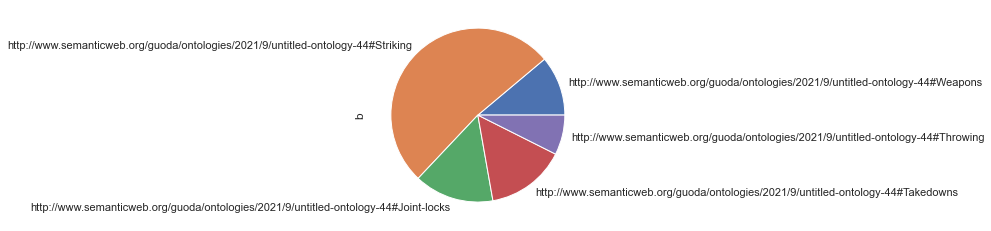

In [145]:
MartialArt.set_index('Focus', inplace=True)## Pandas
MartialArt['b'].plot.pie()

## Part 2

AncestorOf

Continue Story here

In [134]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -q -s MartialArt
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
select ?martialArt (count(?z) as ?descendants) where {
   ?s rdfs:label ?martialArt .
   ?s dbp:descendantArts ?z .
    
}  Group by ?martialArt order by ?descendants

<AxesSubplot:ylabel='martialArt'>

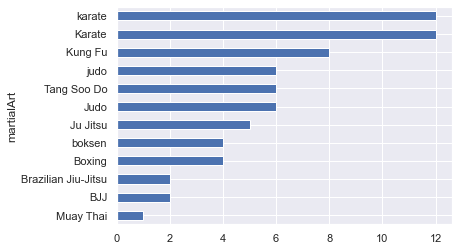

In [135]:
MartialArt.set_index('martialArt', inplace=True)## Pandas
MartialArt['descendants'].plot.barh()

## Part 3

OlympicStatus, Primaryfocus

Continue Story here

In [146]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -q -s MartialArt
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
select ?Name ?OlympicStatus ?Purpose where {
    ?z rdfs:label ?Name .
    ?z ma:primaryPurpose ?Purpose .
  SERVICE <https://dbpedia.org/sparql> {
     ?s dbp:olympic ?OlympicStatus .
     ?s rdfs:label ?Name .
     FILTER (str(?OlympicStatus)!="No") .
 }
} order by ?Purpose

In [161]:
# Styling: https://pandas.pydata.org/docs/user_guide/style.html
# Using CSS Hue-Saturation-Level colors: https://www.w3schools.com/colors/colors_hsl.asp

def purpose_color(purpose):
    colours = {"Self-defence":120, "Sport": 0}
    return f'background: hsl({colours.get(str(purpose).split("#")[-1], 230)}, 75%, 30%)' 

MartialArt.style \
    .applymap(purpose_color, subset=(slice(None), "Purpose"))

,Name,OlympicStatus,Purpose
0,Boxing,688,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
1,Boxing,1904,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
2,Boxing,688,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
3,Boxing,1904,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
4,Judo,* Accepted as an Olympic sport in 1960 * Contested since 1964 and 1992,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
5,Judo,* Accepted as an Olympic sport in 1960 * Contested since 1964 and 1992,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
6,Karate,Debuted in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
7,Karate,Will debut in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
8,Karate,Debuted in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
9,Karate,Will debut in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence


## Q4

Martial arts in the netherlands


In [128]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -q -s MartialArt
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
select distinct ?Location ?Sport ?Lat ?Long where { 
    ?s ma:accomodatesSportType ?b .
    ?b rdf:type ma:MartialArt .
    ?b rdfs:label ?Sport .
    ?s rdfs:label ?Location .
	?s ma:hasX ?Long .
    ?s ma:hasY ?Lat
}  order by ?Sport

In [131]:
from pyproj import Proj, transform
import folium # pip install folium
# Extract latitude and longitude from coordinates in Well-Known Text (WKT) format
#capitals_coords = capitals.join(capitals.coords.str.extract('Point\((?P<lon>\S+) (?P<lat>\S+)\)').astype(float))
inProj = Proj('epsg:28992')
outProj = Proj('epsg:4326')

#coords = MartialArt.join(transform(inProj,outProj,MartialArt.p, MartialArt.o))
colours = {"Karate":"#3186cc", "Judo":"#e88133", "Tae Kwon Do": "#dd2fed", "Boxing":"#db124b"}

m = folium.Map(location=[52,5], zoom_start=8)
for _, row in MartialArt.iterrows():
    if (row['Sport'] in colours):
        currentColour = colours[row['Sport']]
    else:
        continue
    
    folium.CircleMarker(
        location=transform(inProj,outProj,row['Long'], row['Lat']),
        radius= 7,
        popup= row['Location'],
        color= currentColour,
        fill=True,
        fill_color=currentColour,
    ).add_to(m)

m

# x1,y1 = 115625,483736
# x2,y2 = transform(inProj,outProj,x1,y1)
# print (x2,y2)



<ipython-input-131-62c99bf80dba>:19: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  location=transform(inProj,outProj,row['Long'], row['Lat']),
